In [69]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from pygam import LogisticGAM, s
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
import statsmodels.api as sm

In [70]:
Kinematics_Data = pd.read_csv("Kinematics_Data.csv")
Kinematics_Data

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...,...,...,...,...
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


In [71]:
Kinematics_Data['date'].isnull().sum()

0

In [72]:
Kinematics_Data['time'].isnull().sum()

0

In [73]:
Kinematics_Data['username'].isnull().sum()

0

In [74]:
Kinematics_Data['wrist'].isnull().sum()

0

In [75]:
Kinematics_Data['activity'].isnull().sum()

0

In [76]:
Kinematics_Data['acceleration_x'].isnull().sum()

0

In [77]:
Kinematics_Data['acceleration_y'].isnull().sum()

0

In [78]:
Kinematics_Data['acceleration_z'].isnull().sum()

0

In [79]:
Kinematics_Data['gyro_x'].isnull().sum()

0

In [80]:
Kinematics_Data['gyro_y'].isnull().sum()

0

In [81]:
Kinematics_Data['gyro_z'].isnull().sum()

0

In [82]:
Kinematics_Data['datetime'] = Kinematics_Data['date'] + " " + Kinematics_Data['time']

In [83]:
Kinematics_Data['datetime']

0        2017-6-30 13:51:15:847724020
1        2017-6-30 13:51:16:246945023
2        2017-6-30 13:51:16:446233987
3        2017-6-30 13:51:16:646117985
4        2017-6-30 13:51:16:846738994
                     ...             
88583      2017-7-9 20:9:15:317911028
88584      2017-7-9 20:9:15:517889022
88585      2017-7-9 20:9:15:717828989
88586      2017-7-9 20:9:15:917932987
88587      2017-7-9 20:9:16:117410004
Name: datetime, Length: 88588, dtype: object

In [84]:
Kinematics_Data['datetime'] = pd.to_datetime(Kinematics_Data['datetime'], format='%Y-%m-%d %H:%M:%S:%f')

In [85]:
# Initializing traing data for logistic regression model
x_train = Kinematics_Data[['wrist', 'acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z']]
y_train = Kinematics_Data['activity']
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3, random_state=0)

In [86]:
# Logistic Regression
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)
print(logistic_regression.fit(x_train, y_train).coef_)

[[-1.11287867  0.15237312  7.11947056 -2.57707691 -0.07063381 -0.20434809
   0.11337806]]


In [87]:
predicted_values = logistic_regression.predict(x_test)
conf_matrix = confusion_matrix(y_test,predicted_values)
print(conf_matrix)

[[12005  1233]
 [ 2479 10860]]


In [88]:
# See which predicted values are right or wrong predictions
boolean_vector = predicted_values == y_test
    
# Find misclassification error
error = sum(boolean_vector == False)/len(boolean_vector)
error

0.13966963916168115

In [89]:
# Full Logistic GAM model
logistic_gam = LogisticGAM()
gam = logistic_gam.fit(x_train, y_train)
predicted_values = gam.predict(x_test)
predicted_values = predicted_values.astype(int)

/opt/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/opt/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *


In [90]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test,predicted_values)
print(conf_matrix)

[[13048   190]
 [  357 12982]]


In [91]:
# See which predicted values are right or wrong predictions
boolean_vector = predicted_values == y_test
    
# Find misclassification error
error = sum(boolean_vector == False)/len(boolean_vector)
error

0.0205817059863792

In [92]:
# Standardize Data
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
scaler_2 = preprocessing.StandardScaler().fit(x_test)
x_test_scaled = scaler_2.transform(x_test)

In [93]:
# Neural networks
MLP = MLPClassifier(hidden_layer_sizes=(6,5,2), activation='logistic', solver = 'adam', 
                    batch_size=200, alpha=0.0001, learning_rate='adaptive', max_iter=1000,
                    random_state = 1)

MLP.fit(x_train_scaled,y_train)
predicted_values = MLP.predict(x_test_scaled)

In [94]:
conf_matrix = confusion_matrix(y_test,predicted_values)
print(conf_matrix)

[[13148    90]
 [  155 13184]]


In [95]:
# See which predicted values are right or wrong predictions
boolean_vector = predicted_values == y_test
    
# Find misclassification error
error = sum(boolean_vector == False)/len(boolean_vector)
error

0.009218497196824322

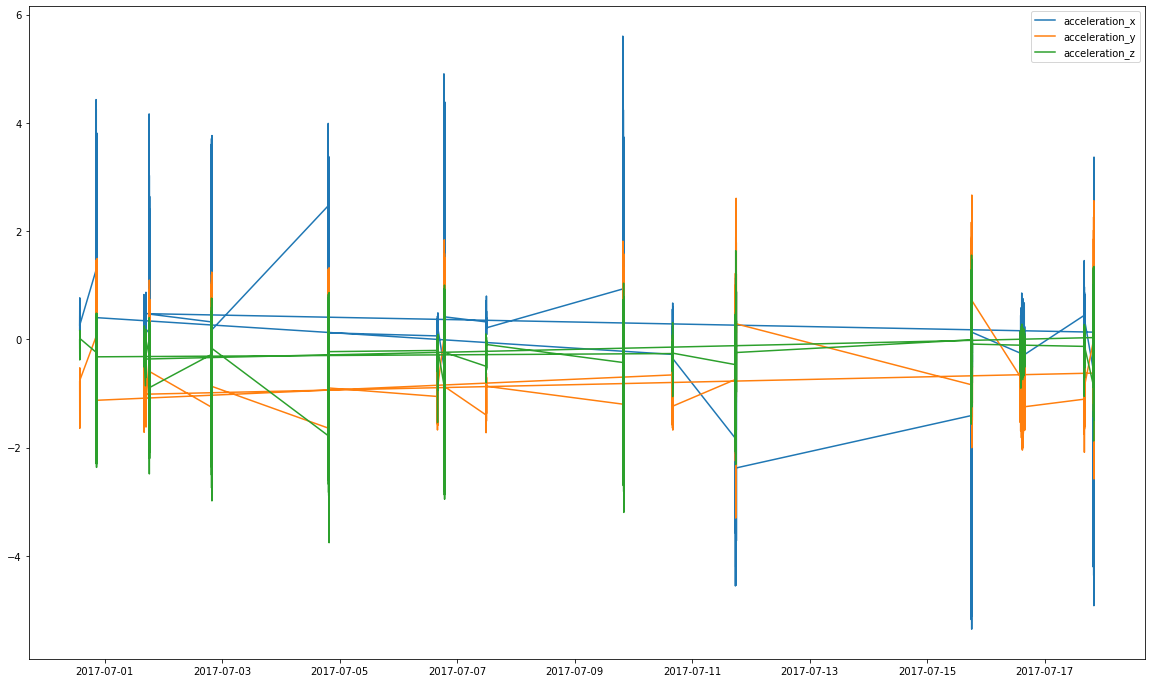

In [96]:
plt.rcParams["figure.figsize"] = (20,12)
plt.plot(Kinematics_Data['datetime'], Kinematics_Data['acceleration_x'], label = "acceleration_x")
plt.plot(Kinematics_Data['datetime'], Kinematics_Data['acceleration_y'], label = "acceleration_y")
plt.plot(Kinematics_Data['datetime'], Kinematics_Data['acceleration_z'], label = "acceleration_z")
plt.legend()
plt.show()

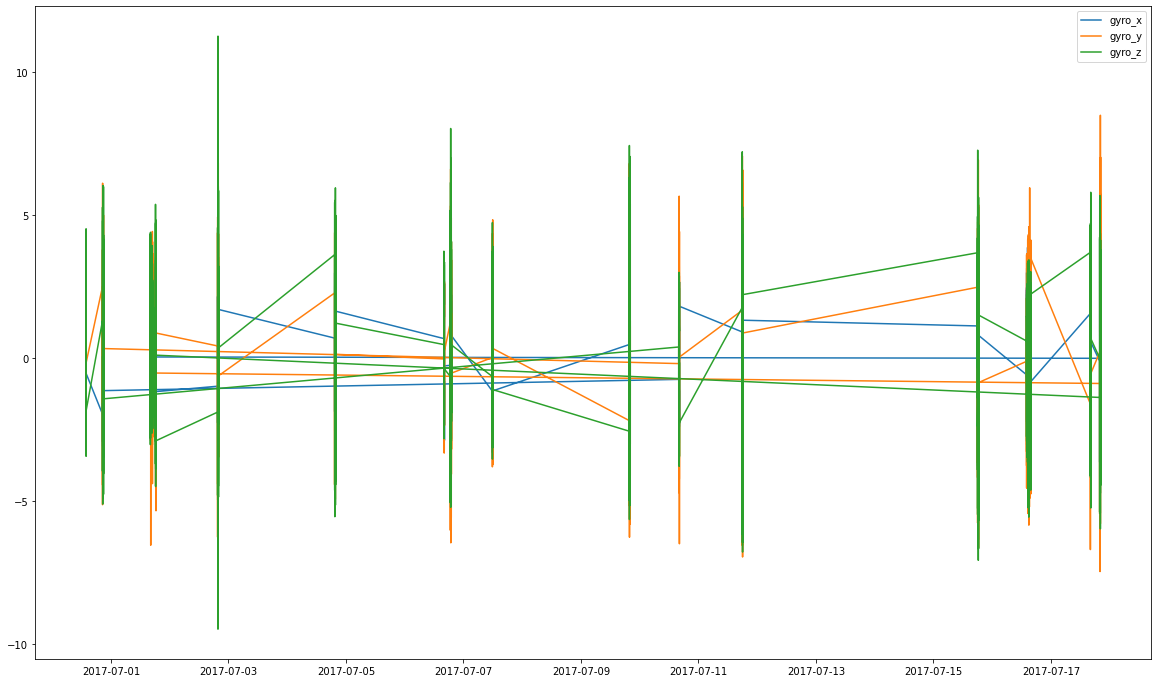

In [97]:
plt.rcParams["figure.figsize"] = (20,12)
plt.plot(Kinematics_Data['datetime'], Kinematics_Data['gyro_x'], label = "gyro_x")
plt.plot(Kinematics_Data['datetime'], Kinematics_Data['gyro_y'], label = "gyro_y")
plt.plot(Kinematics_Data['datetime'], Kinematics_Data['gyro_z'], label = "gyro_z")
plt.legend()
plt.show()

In [98]:
Kinematics_Data_walking = Kinematics_Data[(Kinematics_Data["activity"] == 0) & (Kinematics_Data['date'] == "2017-6-30")]
Kinematics_Data_running = Kinematics_Data[(Kinematics_Data["activity"] == 1) & (Kinematics_Data['date'] == "2017-6-30")]

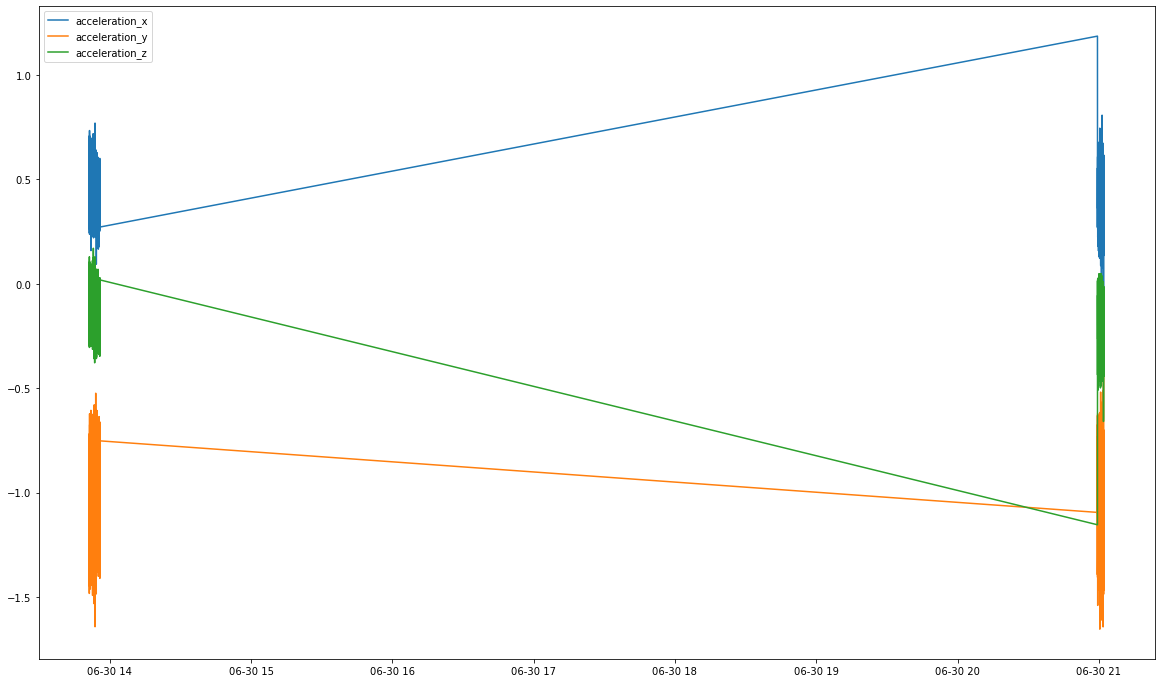

In [99]:
plt.rcParams["figure.figsize"] = (20,12)
plt.plot(Kinematics_Data_walking['datetime'], Kinematics_Data_walking['acceleration_x'], label = "acceleration_x")
plt.plot(Kinematics_Data_walking['datetime'], Kinematics_Data_walking['acceleration_y'], label = "acceleration_y")
plt.plot(Kinematics_Data_walking['datetime'], Kinematics_Data_walking['acceleration_z'], label = "acceleration_z")
plt.legend()
plt.show()

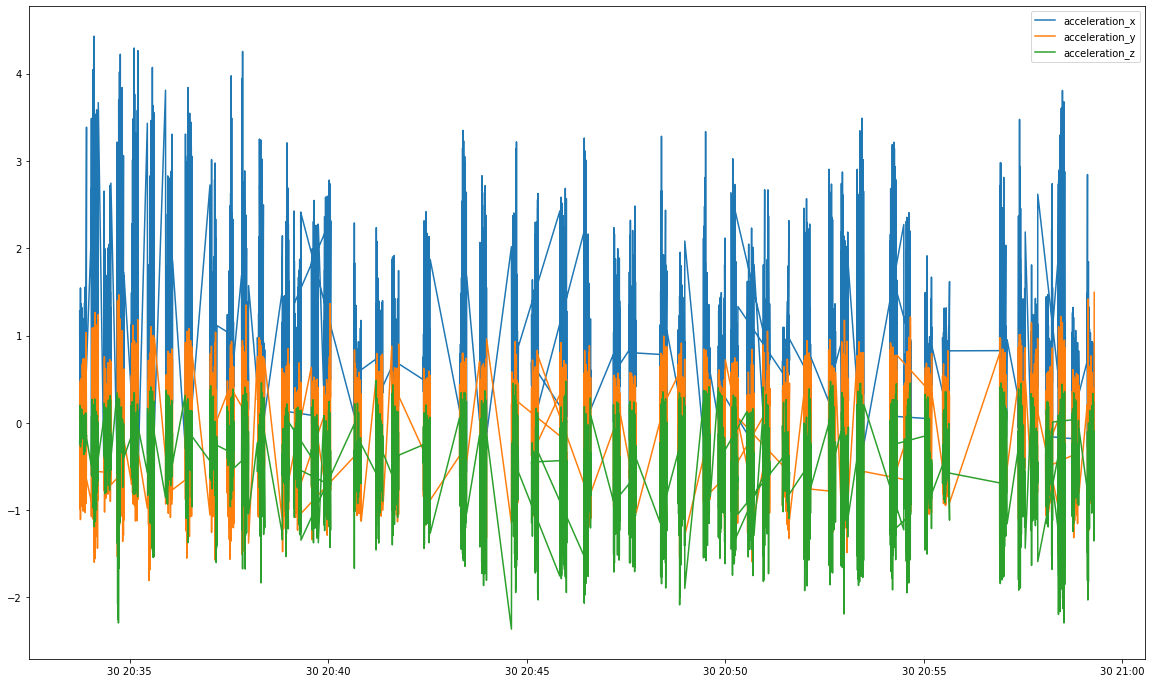

In [100]:
plt.rcParams["figure.figsize"] = (20,12)
plt.plot(Kinematics_Data_running['datetime'], Kinematics_Data_running['acceleration_x'], label = "acceleration_x")
plt.plot(Kinematics_Data_running['datetime'], Kinematics_Data_running['acceleration_y'], label = "acceleration_y")
plt.plot(Kinematics_Data_running['datetime'], Kinematics_Data_running['acceleration_z'], label = "acceleration_z")
plt.legend()
plt.show()

In [101]:
Kinematics_Data_walking

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,datetime
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,2017-06-30 13:51:15.847724020
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,2017-06-30 13:51:16.246945023
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,2017-06-30 13:51:16.446233987
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,2017-06-30 13:51:16.646117985
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,2017-06-30 13:51:16.846738994
...,...,...,...,...,...,...,...,...,...,...,...,...
3987,2017-6-30,21:2:8:6202995,viktor,0,0,0.2186,-0.7348,-0.0129,-1.1487,-0.2527,-1.9833,2017-06-30 21:02:08.620299500
3988,2017-6-30,21:2:8:207017004,viktor,0,0,0.4141,-0.9608,-0.1189,0.3586,1.1180,1.5634,2017-06-30 21:02:08.207017004
3989,2017-6-30,21:2:8:406965970,viktor,0,0,0.2976,-0.9858,-0.1081,1.9872,-2.1475,2.0177,2017-06-30 21:02:08.406965970
3990,2017-6-30,21:2:8:606953024,viktor,0,0,0.6030,-0.8445,-0.3543,0.4446,1.1102,0.6834,2017-06-30 21:02:08.606953024


In [102]:
Kinematics_Data_walking_1 = Kinematics_Data[(Kinematics_Data["activity"] == 0) & (Kinematics_Data['date'] == "2017-7-9")]
Kinematics_Data_running_1 = Kinematics_Data[(Kinematics_Data["activity"] == 1) & (Kinematics_Data['date'] == "2017-7-9")]

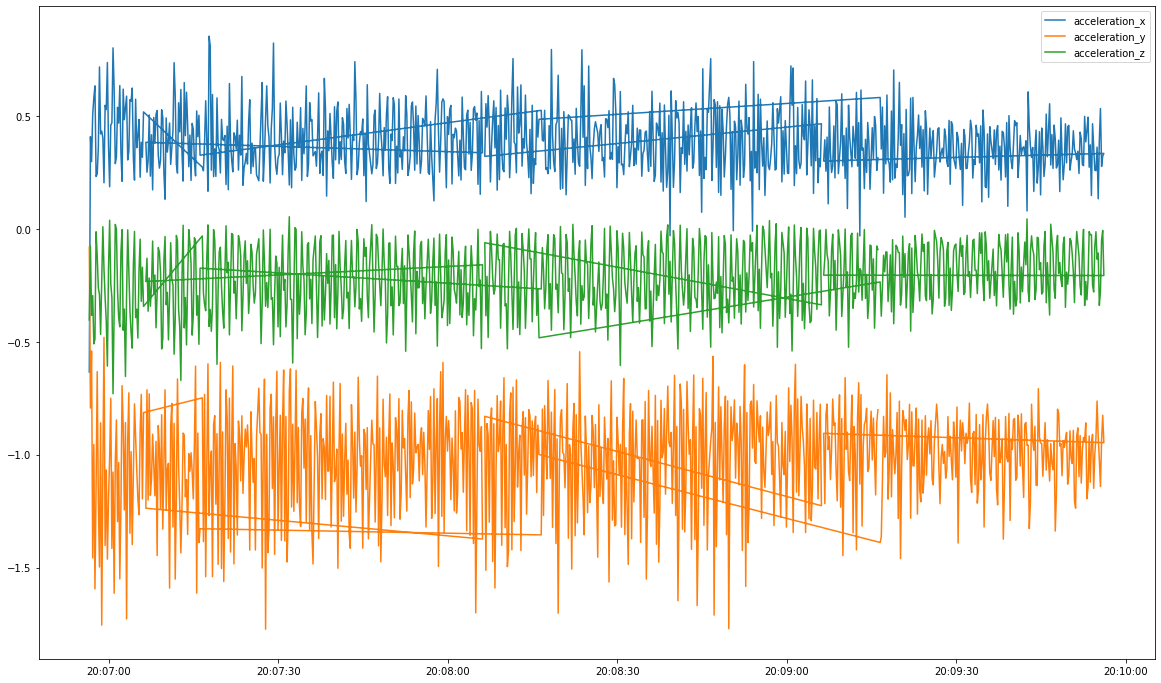

In [103]:
plt.rcParams["figure.figsize"] = (20,12)
plt.plot(Kinematics_Data_walking_1['datetime'], Kinematics_Data_walking_1['acceleration_x'], label = "acceleration_x")
plt.plot(Kinematics_Data_walking_1['datetime'], Kinematics_Data_walking_1['acceleration_y'], label = "acceleration_y")
plt.plot(Kinematics_Data_walking_1['datetime'], Kinematics_Data_walking_1['acceleration_z'], label = "acceleration_z")
plt.legend()
plt.show()

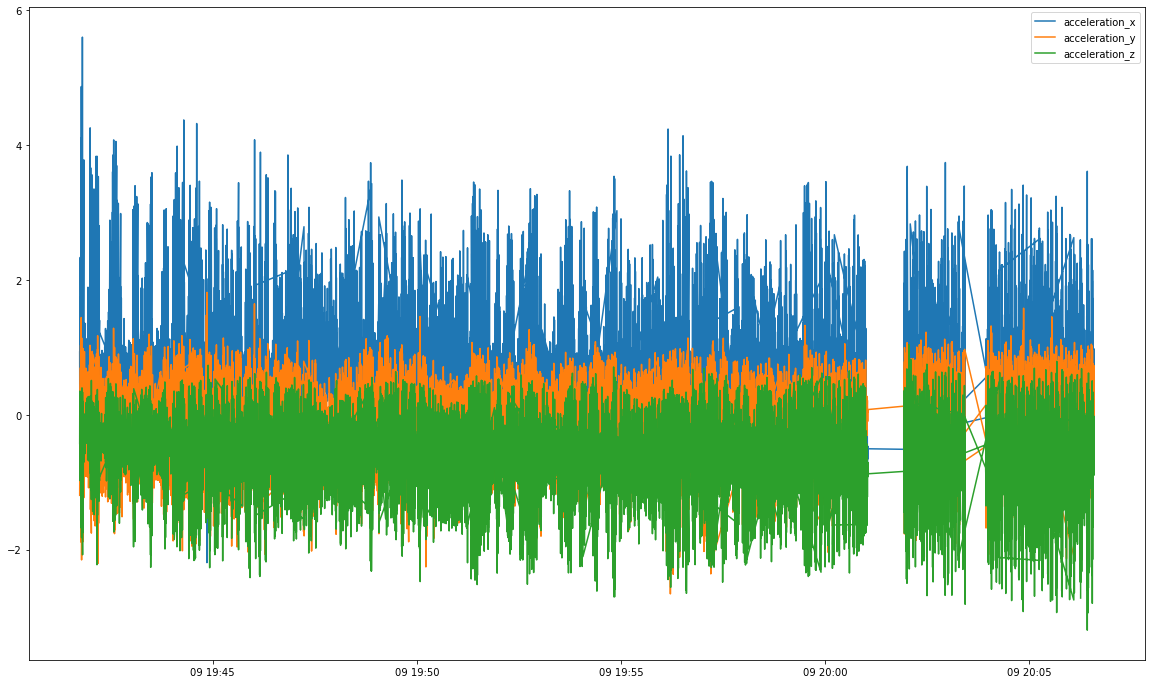

In [104]:
plt.rcParams["figure.figsize"] = (20,12)
plt.plot(Kinematics_Data_running_1['datetime'], Kinematics_Data_running_1['acceleration_x'], label = "acceleration_x")
plt.plot(Kinematics_Data_running_1['datetime'], Kinematics_Data_running_1['acceleration_y'], label = "acceleration_y")
plt.plot(Kinematics_Data_running_1['datetime'], Kinematics_Data_running_1['acceleration_z'], label = "acceleration_z")
plt.legend()
plt.show()